In [1]:
import CMF
import PyPlot; plt = PyPlot;
import Random; Random.seed!(0);
import JLD

## Load datasets

In [2]:
# Constants

K, L = 10, 20
PATH = "/home/anthony/cmf_data/"

runtimes = Dict(
    :maze => 20*60,
    :piano => 30,  # 30
    :drums => 30,  # 30
    :voice => 30  # 30
)
labels = Dict(:hals => "HALS", :mult => "MULT", :anls => "ANLS")
alg_list = [:hals, :mult, :anls]
;

In [3]:
datasets = Dict(
#     :maze => CMF.maze(
#         path=string(PATH, "Achilles_10252013_sessInfo.mat"),
#         epoch=nothing,
#         end_time=-1,
#         bin_time=5e-3,
#         kernel_width=2
#     ),
    :piano => CMF.piano(),
    :drums => CMF.drums_mix(),
    :voice => CMF.female_voices()
)
;

## Fit data

In [4]:
results = Dict()
for key in keys(datasets)
    results[key] = Dict()
    println(string("Fitting ", key))
    
    for alg in alg_list
        results[key][alg] = CMF.fit_cnmf(
            datasets[key], alg=alg,
            K=K, L=L, max_time=runtimes[key], max_itr=Inf
        )
    end
end

Fitting drums
Fitting piano
Fitting voice
Fitting maze


In [5]:
JLD.save("./experimental_comparison.jld", "results", results)

## Plot loss histories

In [4]:
results = JLD.load("./experimental_comparison.jld", "results");

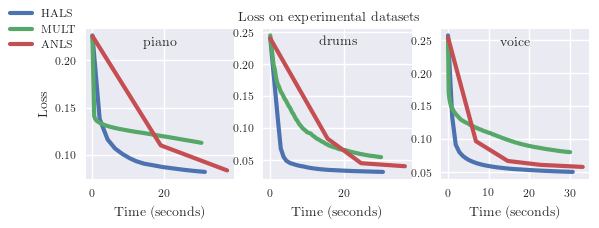

piano(513, 644)
drums(513, 311)
voice(513, 311)


In [15]:
include("./plot_settings.jl")

# Plot

fig, axes = plt.subplots(1, 3, figsize=set_size(doc_textwidth, aspect=0.3))
key_list = [:piano, :drums, :voice]
#axes = [axes[1, 1], axes[1, 2], axes[2, 1], axes[2, 2]]

for i in 1:3
    key = key_list[i]
    
    for alg in alg_list
        r = results[key][alg]
        
        if (i == 1)
            label = labels[alg]
        else
            label = ""
        end
        
        axes[i].plot(
            r.time_hist, r.loss_hist,
            label=label
        )
    end
    axes[i].set_title(key, loc="center", pad=-12)
    println(key, size(datasets[key]))
    axes[i].set_xlabel("Time (seconds)")
    
    if (i == 1)
         axes[i].set_ylabel("Loss")
    end
    plt.show()
end

plt.suptitle("Loss on experimental datasets")
fig.legend(loc="upper left")
plt.savefig("./experimental_comparison.pdf", format="pdf")